## **Project - GROUP 4**

**Import Basic Libraries**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier

**Import .CSV Dataset**

In [50]:
df_csv = pd.read_csv("travel insurance.csv",sep=",")

**Reading Columns In Dataset**

In [51]:
df_csv.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

**Reading Top Head Values**

In [52]:
df_csv.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


**Continuous Variables:-**

In [53]:
num_cols = df_csv._get_numeric_data().columns
con_var = []
for i in num_cols:
  if(len(df_csv[i].unique())) > 5:
     con_var.append(i)
print(con_var)  

['Duration', 'Net Sales', 'Commision (in value)', 'Age']


**Categorical Variables**

In [54]:
cat_var1=list(set(df_csv.columns) - set(con_var))
for i in cat_var1:
  print(i, "\t", len(df_csv[i].unique()))

Product Name 	 26
Claim 	 2
Destination 	 149
Distribution Channel 	 2
Agency 	 16
Agency Type 	 2
Gender 	 3


**Task-1 - Perform Dataset overview, Uni-variate & Bi-variate analysis with Charts**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d81f7a550>,
      dtype=object)

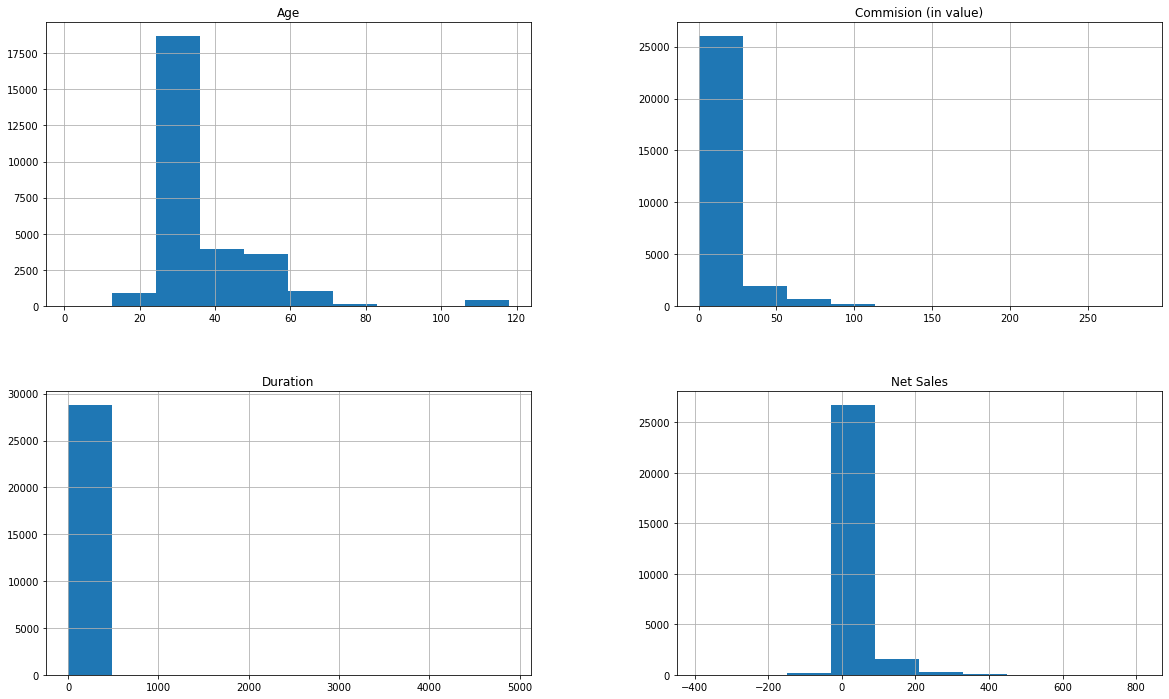

In [48]:
df_csv.hist(figsize=[20,12])

**Inferences From Above Graph:-**
1. There are around 33500 peoples of age between 35 to 45 in agencies
2. There are around 15500 peoples of age between 25 to 35 in agencies
3. There are around 8000 peoples of age above 45 to 60 in agencies
4. There are around 100 peoples of age above 100 in the agencies also
5. There are more than 50000 peoples whose commision is in between 0 to 25 & around 500 peoples whose comission is between 25 to 55
6. There are some peoples whose commision is above 150 
7. The duration of all the claims by people in various industries is in between 0 to 400
8. The net sales of around 58000 peoples in various agencies is in negative i.e. -40 to 0 & some of them even touch -180
9. The net sales of around 58000 peoples in various agencies is in the same positive sacle i.e. 0 to 90
10. The net sales of around 3500 peoples in various agencies is in between 90 to 210 & some of them even touched above 400

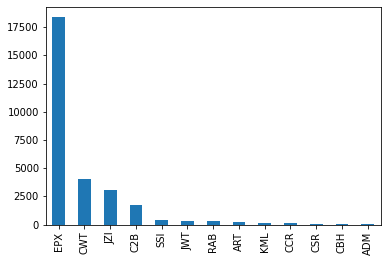

In [49]:
df_csv['Agency'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- The company which claims insurance maximum number of times i.e. 35000 is EPX & least number of times is ADM

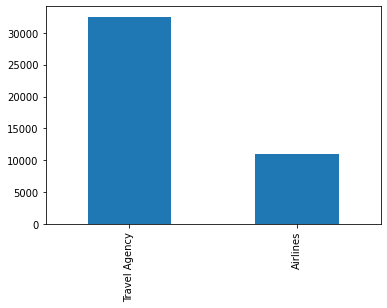

In [10]:
df_csv['Agency Type'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- There are such instances when travel agencies claims insurance maximum number of times as compared to airlines

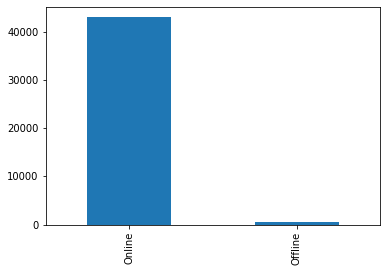

In [11]:
df_csv['Distribution Channel'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- There are maximum number of online distribution channels i.e. above 60000 as compared to the offline ones

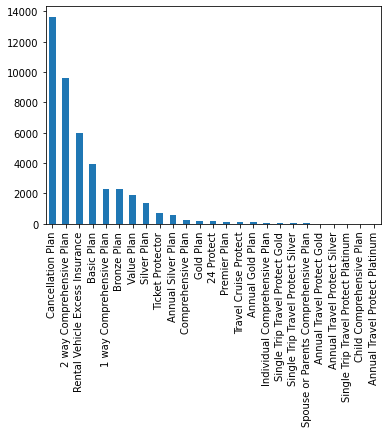

In [12]:
df_csv['Product Name'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- The product 'Cancellation Plan' has maximum number of instances i.e. above 17500 as compared to other products

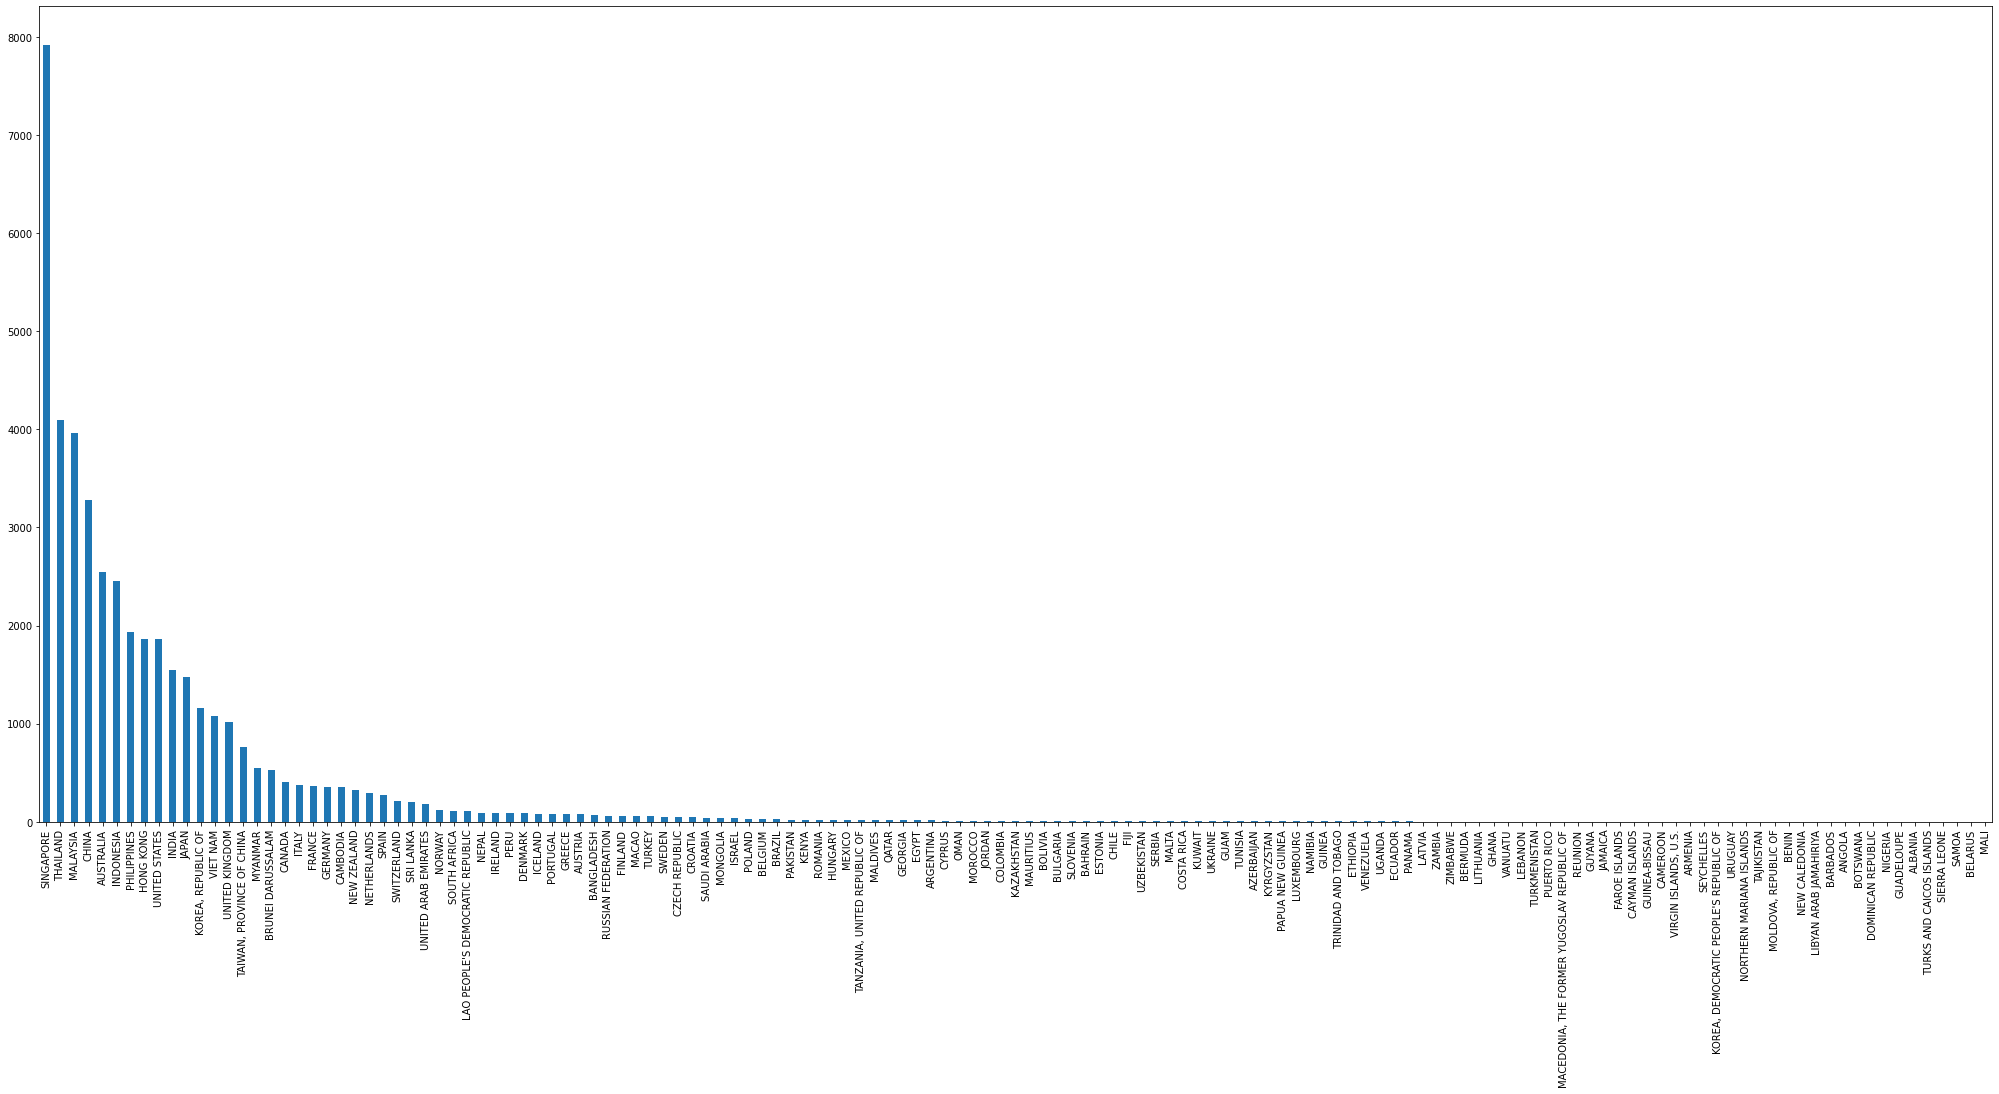

In [17]:
df_csv['Destination'].value_counts().plot.bar(figsize=(35,15))

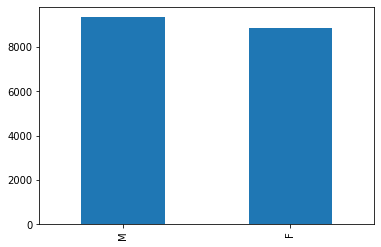

In [ ]:
df_csv['Gender'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- There are slightly more count of males in various agencies as compared to their female counterparts

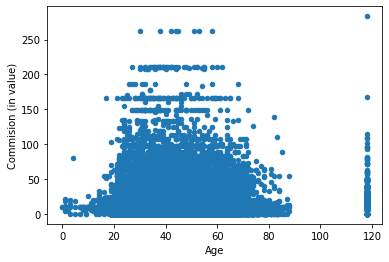

In [ ]:
df_csv.plot.scatter(x='Age', y='Commision (in value)')

**Inferences From Above Graph:-**
1. The commision of majority of people aged between 20 to 80 lies upto 100 & for 8-9 people it goes above 250 as well
2. The highest commision is earned by people of age about 118 which is near to 300

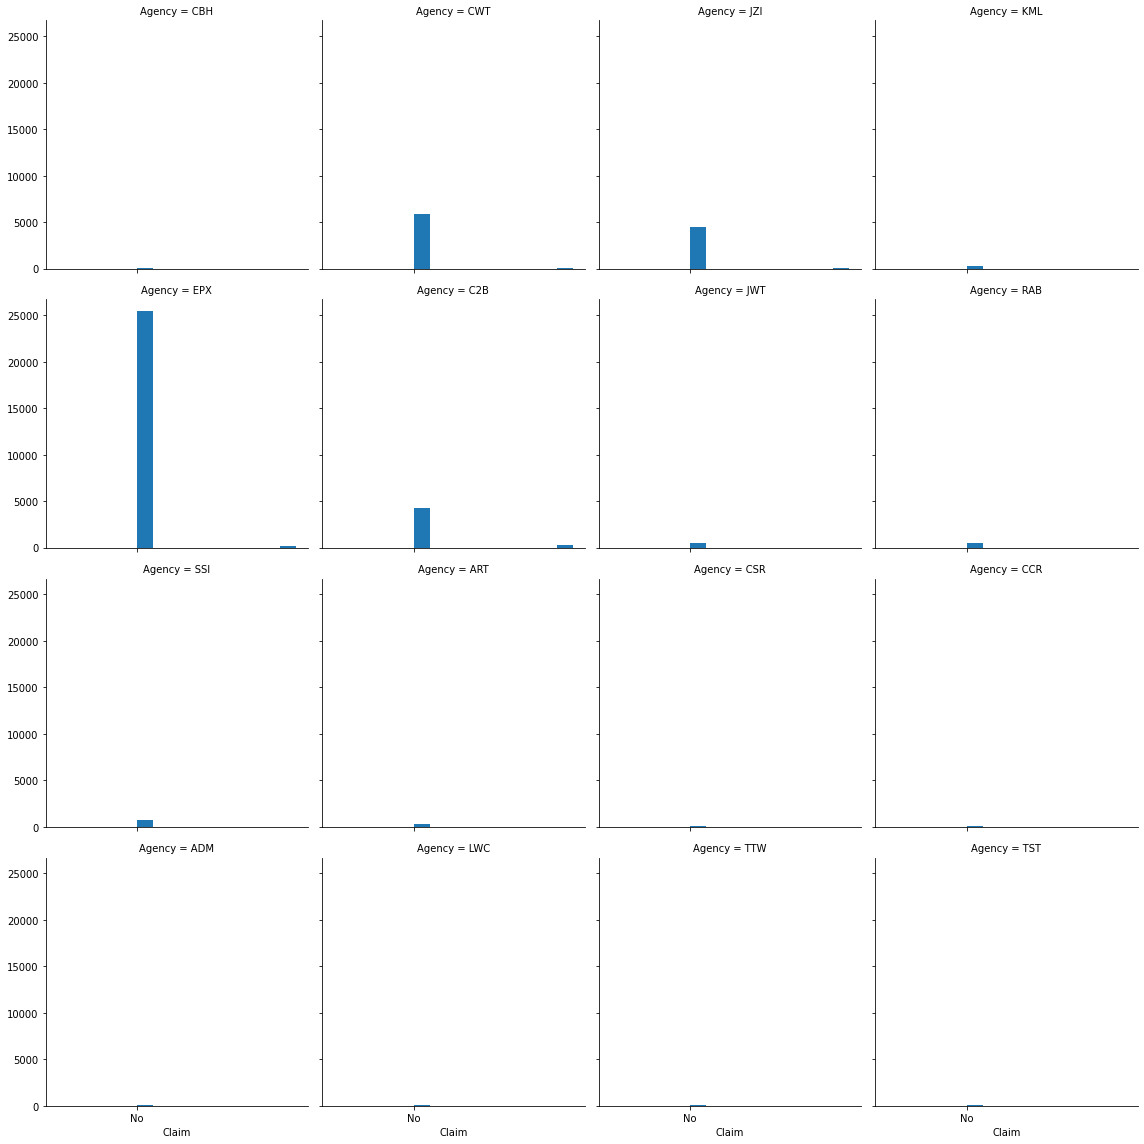

In [25]:
fn = sns.FacetGrid(df_csv,col='Agency',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Claim')

**Inferences From Above Graph:-**
1. All the agencies reject majority of claims with EPX recorded higher rate of rejection
2. Only few agencies recorded some amount of acceptance which are C2B, EPX, CWT, JZI

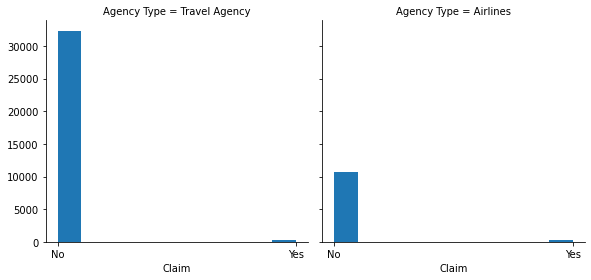

In [26]:
fn = sns.FacetGrid(df_csv,col='Agency Type',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Claim')

**Inferences From Above Graph:-**
- Travel Agency recorded more amount of claims rejection rate as compared to Airlines but both of them recorded equal & small amount of acceptance 

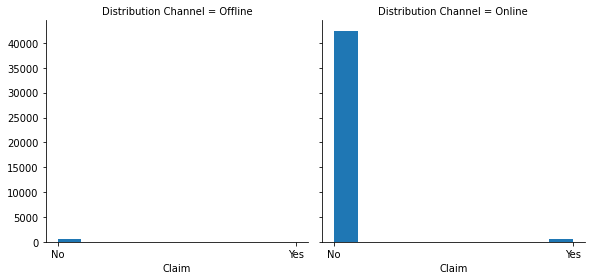

In [27]:
fn = sns.FacetGrid(df_csv,col='Distribution Channel',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Claim')

**Inferences From Above Graph:-**
- The majority of claims are recorded in online distribution channel but with very high ratio of rejectance & also online distribution channel recorded more number of claim acceptance as comapred to offline ones

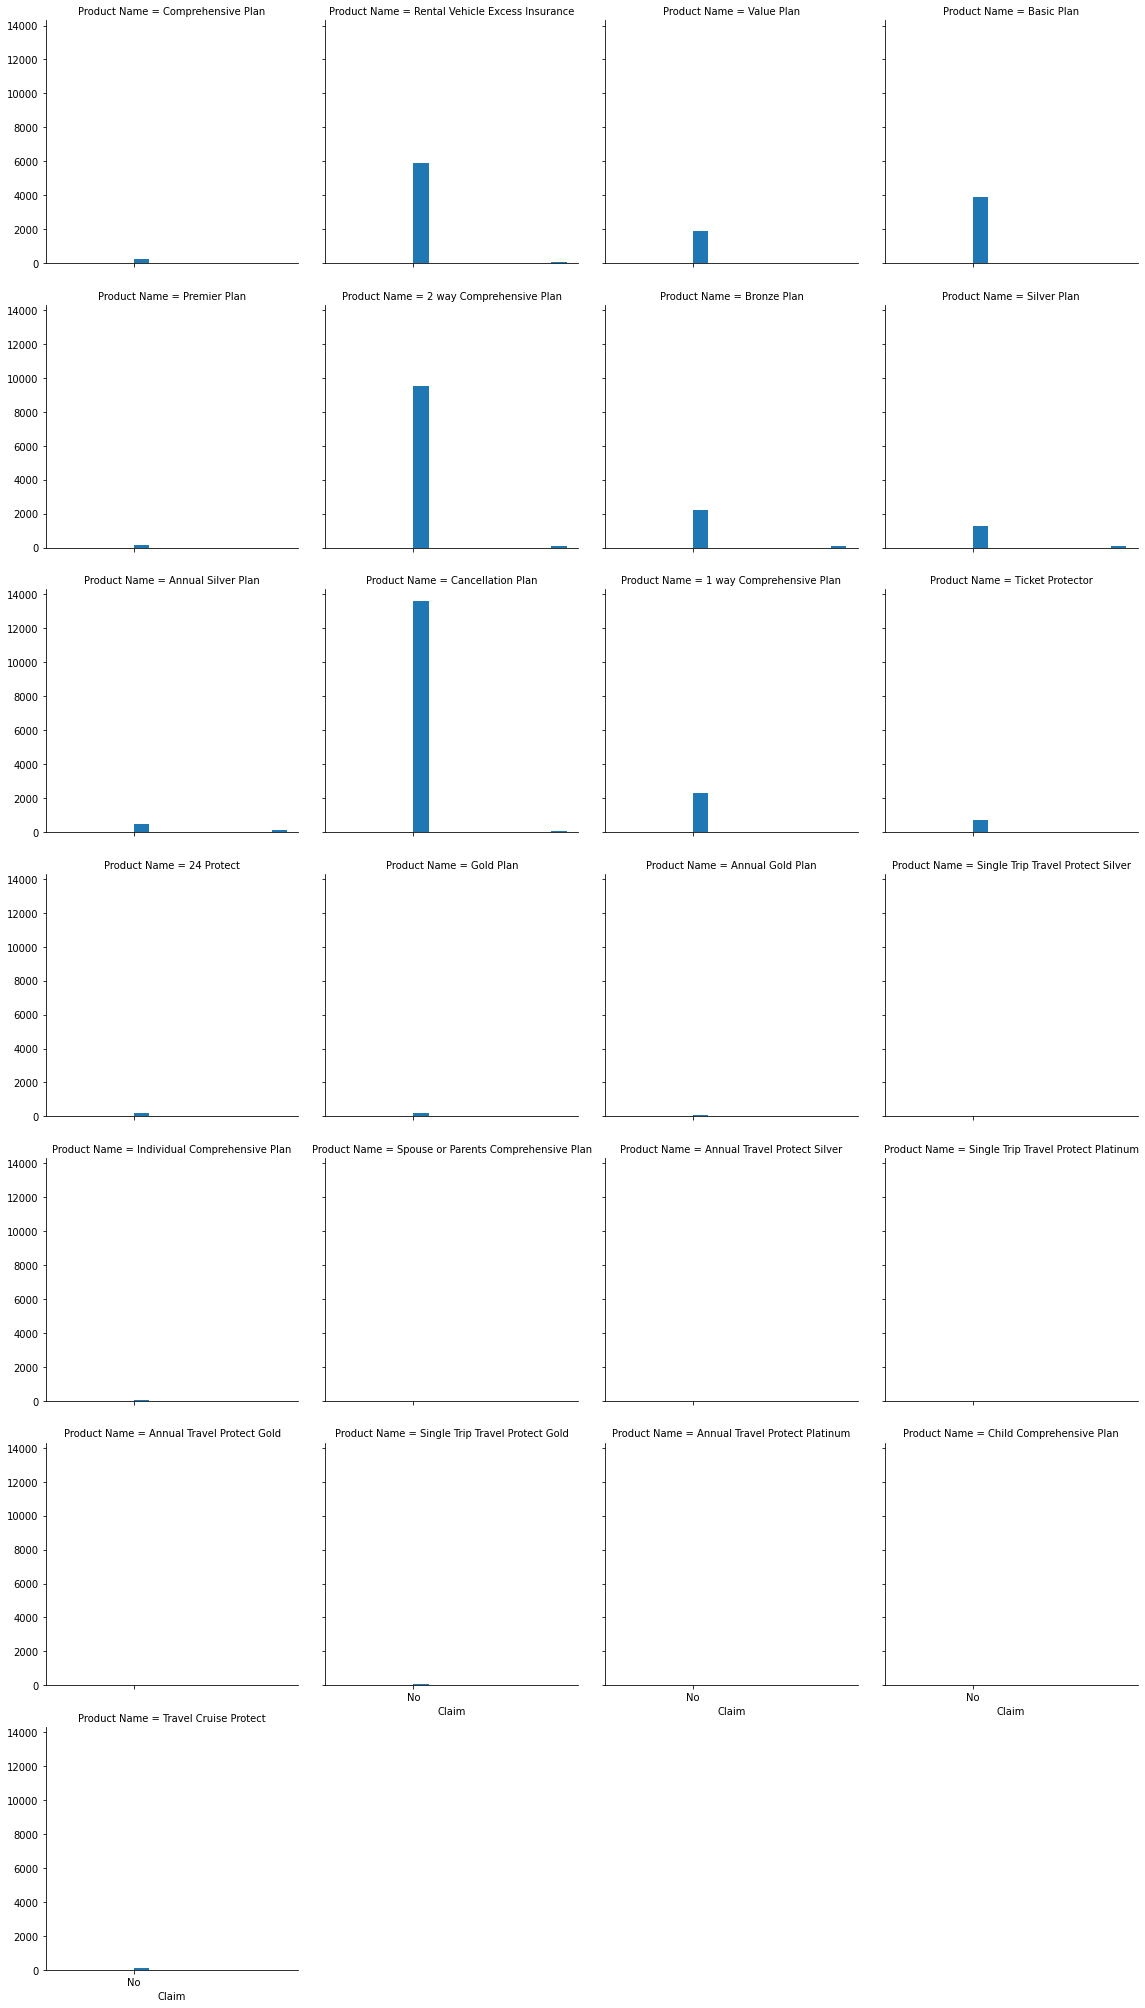

In [28]:
fn = sns.FacetGrid(df_csv,col='Product Name',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Claim')

**Inferences From Above Graph:-**
- Only Products - Rental Vehicle Excess Insurance, 2 Way Comprehensive Plan, Bronze Plan, Silver Plan, Annual Silver Plan, Cancellation Plan recorded some amount of insurance claim acceptance & rest of products recorded rejectance

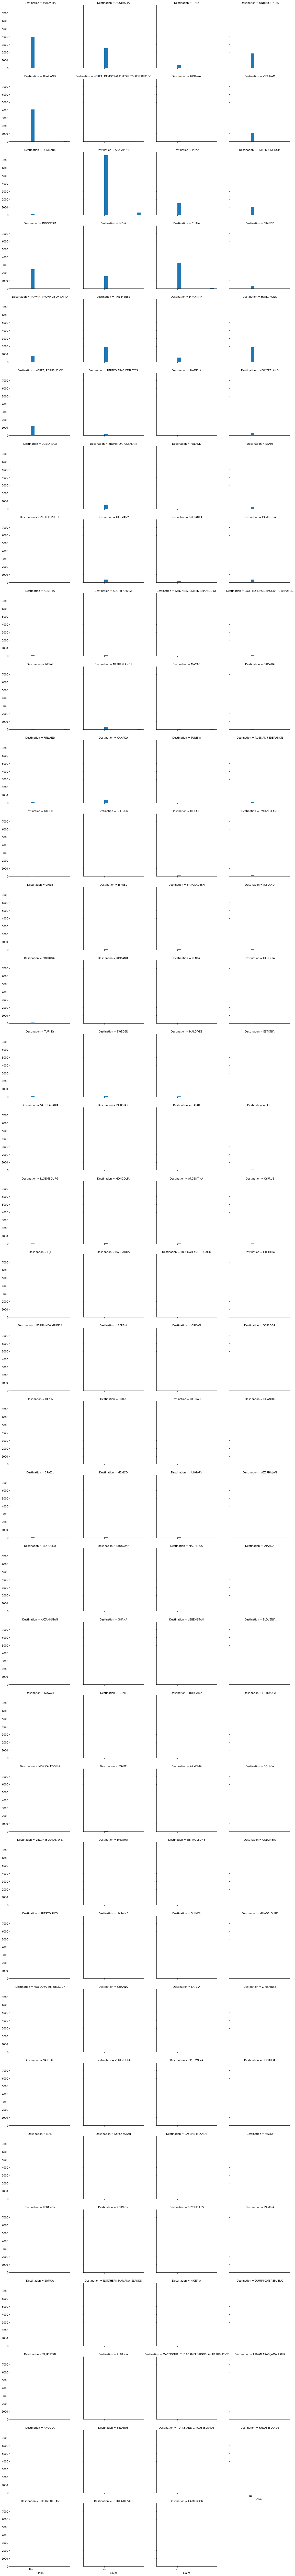

In [29]:
fn = sns.FacetGrid(df_csv,col='Destination',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Claim')

**Inferences From Above Graph**
1. Agencies in singapore recorded high amount of claim rejectance 
2. There are very less number of countries who recorded few numbers of claim acceptance 

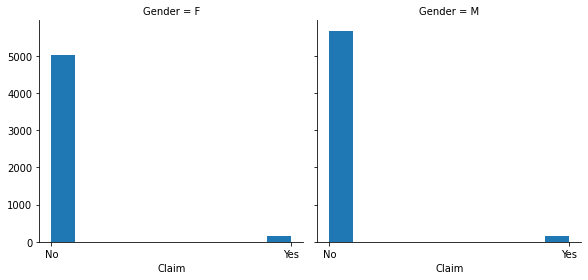

In [30]:
fn = sns.FacetGrid(df_csv,col='Gender',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Claim')

**Inferences From Above Graph:-**
- Both males & females from various agencies recorded majority of claim rejectance as compared to acceptance 

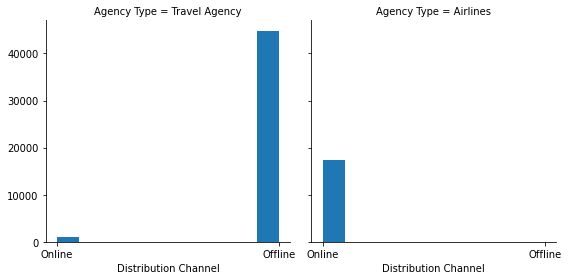

In [ ]:
fn = sns.FacetGrid(df_csv,col='Agency Type',height=4,aspect=1)
fn = fn.map(plt.hist,'Distribution Channel')

**Inferences From Above Graph:-**
1. There are more offline agencies who claims insurance when we talk about Travel Agency
2. There are no offline agencies who claims insurance when we talk about Airlines; all are online ones  

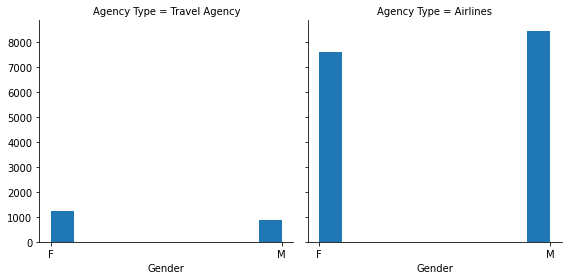

In [ ]:
fn = sns.FacetGrid(df_csv,col='Agency Type',height=4,aspect=1)
fn = fn.map(plt.hist,'Gender')

**Inferences From Above Graph:-**
1. There are majority of peoples worked in Airlines as compared to Travel Agency whether they are males or females
2. There are more females in Travel Agencies & more males in Airlines

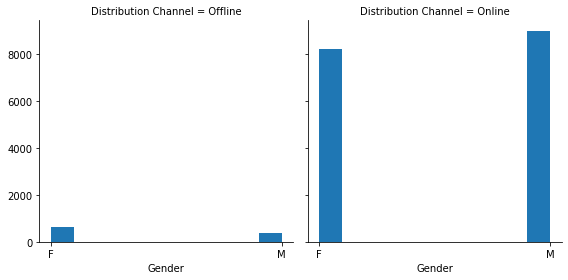

In [ ]:
fn = sns.FacetGrid(df_csv,col='Distribution Channel',height=4,aspect=1)
fn = fn.map(plt.hist,'Gender')

**Inferences From Above Graph:-**
1. The majority of agencies worked in online distribution channel than the offline ones
2. There are more females in offline distribution channel & more males in online distribution channel

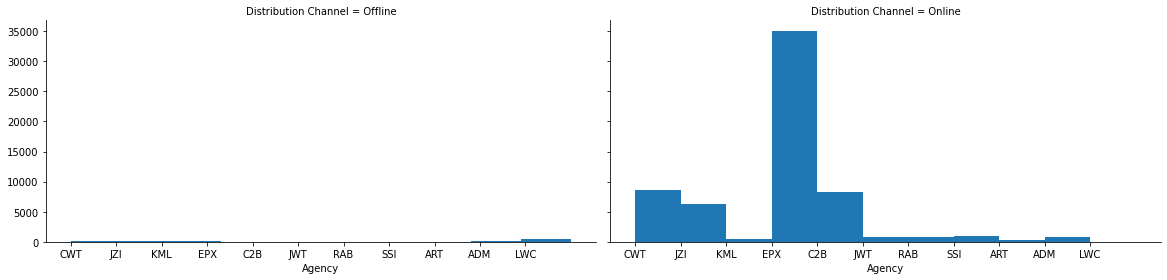

In [ ]:
fn = sns.FacetGrid(df_csv,col='Distribution Channel',col_wrap=4,height=4,aspect=2)
fn = fn.map(plt.hist,'Agency')

**Inferences From Above Graph:-**
1. There are almost none or very less number of agencies whose distribution channel is offline
2. The maximum number of insurance claim by agency for online distribution channel is EPX & least is ART

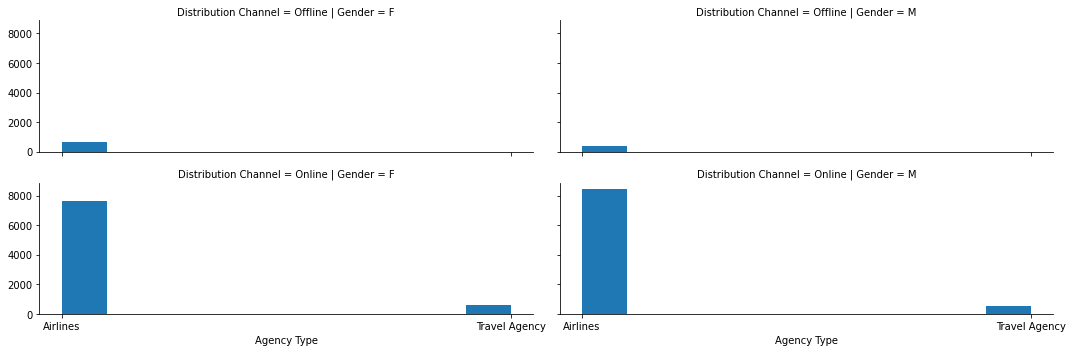

In [ ]:
fn = sns.FacetGrid(df_csv,col='Gender',row='Distribution Channel',palette="GnBu_d",gridspec_kws={"width_ratios": [4, 4]}, height=2.5,aspect=3)
fn = fn.map(plt.hist,"Agency Type")

**Inferences From Above Graph:-**
1. There are no travel agencies whose distribution channel is offline whether they are males or females
2. There are more number of airlines agency as compared to travel agency whose distribution channel is online whether they are males or females

**Task-2 - Identify Outliers, Missing Values If Any**

In [55]:
#Check Skewness
for i in con_var:
  print(str(i)+' : '+str(df_csv[i].skew()))

Duration : 23.179616864234475
Net Sales : 3.272372822599944
Commision (in value) : 4.032268514691959
Age : 2.987709841829195


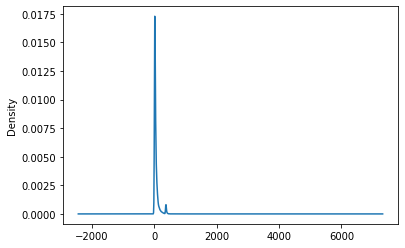

In [56]:
df_csv['Duration'].plot.kde()

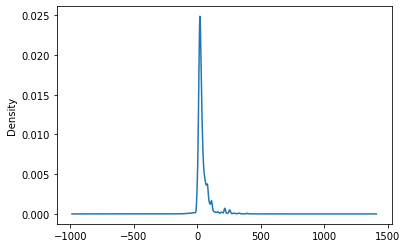

In [57]:
df_csv['Net Sales'].plot.kde()

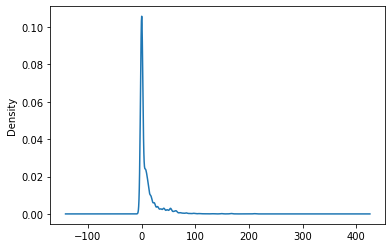

In [58]:
df_csv['Commision (in value)'].plot.kde()

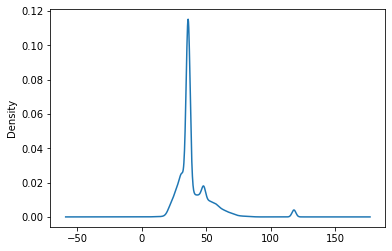

In [59]:
df_csv['Age'].plot.kde()

In [60]:
#Using Quantile flooring  at 5% & 95%
for i in con_var:
  #Defning the lower & upper cap/cutoff
  lower_cutoff = df_csv[i].quantile(0.05)
  upper_cutoff = df_csv[i].quantile(0.95)
  #Replacing the Outliers from both ends with capped cutoffs
  df_csv[i] = np.where(df_csv[i] < lower_cutoff,lower_cutoff,df_csv[i])
  df_csv[i] = np.where(df_csv[i] > upper_cutoff, upper_cutoff,df_csv[i])
  print('Revised skew after Outlier handling '+str(i)+' : '+str(df_csv[i].skew()))

Revised skew after Outlier handling Duration : 1.8510202683098655
Revised skew after Outlier handling Net Sales : 1.3179346560049363
Revised skew after Outlier handling Commision (in value) : 1.8947098069504429
Revised skew after Outlier handling Age : 1.0252876162683797


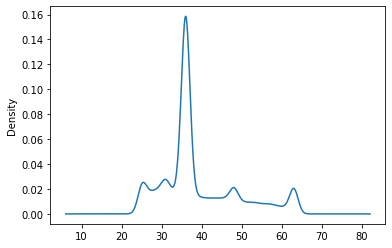

In [61]:
df_csv['Age'].plot.kde()

0.498831375018346


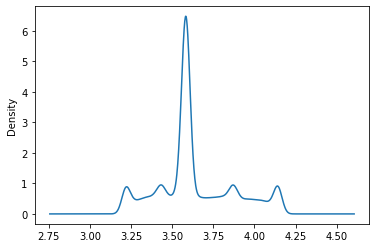

In [62]:
df_csv["Log_Age"] = df_csv["Age"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df_csv['Log_Age'].skew())
df_csv['Log_Age'].plot.kde()

In [63]:
Q1=df_csv.quantile(0.1)
Q3=df_csv.quantile(0.9)
IQR=Q3-Q1
df_remove = ((df_csv < (Q1 - 1.5 * IQR)) |(df_csv > (Q3 + 1.5 * IQR))).sum()
df_remove

Age                     0
Agency                  0
Agency Type             0
Claim                   0
Commision (in value)    0
Destination             0
Distribution Channel    0
Duration                0
Gender                  0
Log_Age                 0
Net Sales               0
Product Name            0
dtype: int64

In [64]:
df_qua=df_csv[~((df_csv < (Q1 - 1.5 * IQR)) |(df_csv > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_csv.shape)
print(df_qua.shape)

(63326, 12)
(63326, 12)


In [65]:
df_csv.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
Log_Age                     0
dtype: int64

**As we can see Gender contains lots of missing values i.e. out of 63326 records, 45107 records are empty & also there is no need of gender in predicting whether the insurance claims are rejected or accepted, so there is no need of 'Gender' in our dataset anymore.**

**Hence, Drop Gender From The Dataset**

In [66]:
df_csv = df_csv.drop(columns = 'Gender')

In [67]:
#Checking Sparse rows , if >= 33.3% of columns of a record is not populated then remove the record itself
# Found no record Sparsely populated
rows_missing = df_csv.isnull().sum(axis=1).reset_index() 
rows_missing.columns = ['row','mis_cnt']
rows_missing[(rows_missing['mis_cnt'] > int(df_csv.shape[1]/3))]

,row,mis_cnt


In [68]:
df_csv.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Log_Age                 0
dtype: int64

**Task-3 - Derive Correlation patterns of each Independent variable with Dependent variable (Claim)**

In [96]:
df_enc = df_csv.copy()

In [97]:
le = LabelEncoder()
df_enc['enc_Claim'] = le.fit_transform(df_enc['Claim'])
df_enc.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age,Log_Age,enc_Claim
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186.0,MALAYSIA,4.8825,9.57,63.0,4.143135,0
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186.0,MALAYSIA,4.8825,9.57,63.0,4.143135,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65.0,AUSTRALIA,4.8825,29.70,32.0,3.465736,0
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60.0,AUSTRALIA,4.8825,23.76,32.0,3.465736,0
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79.0,ITALY,4.8825,11.88,41.0,3.713572,0


In [98]:
cat_var1 = list(set(cat_var1)-set(['Gender']))
cat_var1

['Product Name',
 'Claim',
 'Destination',
 'Distribution Channel',
 'Agency',
 'Agency Type']

In [99]:
for j in cat_var1:
  df_enc['enc_'+str(j)] = le.fit_transform(df_enc[j])
df_enc = df_enc.drop(columns = cat_var1)
df_enc = df_enc.drop('enc_Claim',axis=1)

In [100]:
df_enc.shape

(63326, 10)

In [101]:
df_enc.head()

,Duration,Net Sales,Commision (in value),Age,Log_Age,enc_Product Name,enc_Destination,enc_Distribution Channel,enc_Agency,enc_Agency Type
0,186.0,4.8825,9.57,63.0,4.143135,12,79,0,3,1
1,186.0,4.8825,9.57,63.0,4.143135,12,79,0,3,1
2,65.0,4.8825,29.70,32.0,3.465736,16,4,1,6,1
3,60.0,4.8825,23.76,32.0,3.465736,16,4,1,6,1
4,79.0,4.8825,11.88,41.0,3.713572,16,61,1,6,1


In [102]:
corr = df_enc.corr()
corr.head(10)

,Duration,Net Sales,Commision (in value),Age,Log_Age,enc_Product Name,enc_Destination,enc_Distribution Channel,enc_Agency,enc_Agency Type
Duration,1.000000,0.375109,0.334036,0.002489,-0.000237,-0.059351,0.056047,-0.058886,-0.075042,-0.060678
Net Sales,0.375109,1.000000,0.542445,0.032711,0.027441,-0.036621,0.015790,0.000520,-0.202411,-0.068737
Commision (in value),0.334036,0.542445,1.000000,0.152269,0.126456,0.396936,-0.043006,-0.004074,-0.235838,-0.246294
Age,0.002489,0.032711,0.152269,1.000000,0.989794,0.217030,-0.014016,-0.151275,0.150768,-0.190556
Log_Age,-0.000237,0.027441,0.126456,0.989794,1.000000,0.186344,-0.023881,-0.128292,0.169774,-0.153874
enc_Product Name,-0.059351,-0.036621,0.396936,0.217030,0.186344,1.000000,-0.069257,-0.155318,0.138890,-0.272308
enc_Destination,0.056047,0.015790,-0.043006,-0.014016,-0.023881,-0.069257,1.000000,-0.052289,-0.208348,-0.150909
enc_Distribution Channel,-0.058886,0.000520,-0.004074,-0.151275,-0.128292,-0.155318,-0.052289,1.000000,-0.191928,-0.076895
enc_Agency,-0.075042,-0.202411,-0.235838,0.150768,0.169774,0.138890,-0.208348,-0.191928,1.000000,0.207529
enc_Agency Type,-0.060678,-0.068737,-0.246294,-0.190556,-0.153874,-0.272308,-0.150909,-0.076895,0.207529,1.000000


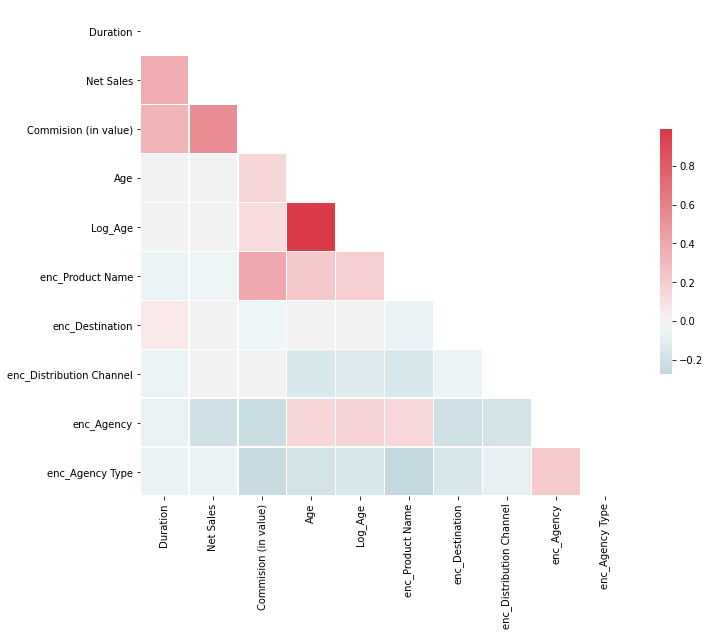

In [103]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**Variables That Have Strong Correlations Are:-**
- (Log_Age , Age)
- (Net Sales , Duration)
- (Commision (in value) , Duration)
- (Commision (in value) , Net Sales)
- (Age , Commision (in value))
- (enc_Product Name, Commision (in value))

**Task-4 - Using Target Variable - Claim, Identify class imbalance & explore methods to handle it**

In [ ]:
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(df_csv['Claim']))
df_target.columns = (['Claim'])
df_target.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [ ]:
print(df_target['Claim'].value_counts())
lbl_1,lbl_0 = df_target['Claim'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/df_target['Claim'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/df_target['Claim'].count()))

0    62399
1      927
Name: Claim, dtype: int64
Label 1 class %age: 98.53614629062312
Label 0 class %age: 1.4638537093768753
